In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim

In [6]:
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, seq_length + 1) 
        sine_wave = np.sin(x) 
        X.append(sine_wave[:-1]) 
        y.append(sine_wave[1:])  
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000
X, y = generate_data(seq_length, num_samples)
print(X[:2])


X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

print(X.shape, y.shape)  

[[ 0.00000000e+00  1.25333234e-01  2.48689887e-01  3.68124553e-01
   4.81753674e-01  5.87785252e-01  6.84547106e-01  7.70513243e-01
   8.44327926e-01  9.04827052e-01  9.51056516e-01  9.82287251e-01
   9.98026728e-01  9.98026728e-01  9.82287251e-01  9.51056516e-01
   9.04827052e-01  8.44327926e-01  7.70513243e-01  6.84547106e-01
   5.87785252e-01  4.81753674e-01  3.68124553e-01  2.48689887e-01
   1.25333234e-01 -3.21624530e-16 -1.25333234e-01 -2.48689887e-01
  -3.68124553e-01 -4.81753674e-01 -5.87785252e-01 -6.84547106e-01
  -7.70513243e-01 -8.44327926e-01 -9.04827052e-01 -9.51056516e-01
  -9.82287251e-01 -9.98026728e-01 -9.98026728e-01 -9.82287251e-01
  -9.51056516e-01 -9.04827052e-01 -8.44327926e-01 -7.70513243e-01
  -6.84547106e-01 -5.87785252e-01 -4.81753674e-01 -3.68124553e-01
  -2.48689887e-01 -1.25333234e-01]
 [-2.44929360e-16  1.25333234e-01  2.48689887e-01  3.68124553e-01
   4.81753674e-01  5.87785252e-01  6.84547106e-01  7.70513243e-01
   8.44327926e-01  9.04827052e-01  9.5105

In [11]:
class SimpleRNN(nn.Module): 
    def __init__(self, input_size, hidden_size, output_size):

        super(SimpleRNN, self).__init__()     
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(x.device)

        out, _ = self.rnn(x, h0) 
        out = self.fc(out) 
        return out

input_size = 1 
hidden_size = 20
output_size = 1 
model = SimpleRNN(input_size, hidden_size, output_size)

In [14]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))  
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.3702
Epoch [20/100], Loss: 0.2882
Epoch [30/100], Loss: 0.1929
Epoch [40/100], Loss: 0.0892
Epoch [50/100], Loss: 0.0612
Epoch [60/100], Loss: 0.0439
Epoch [70/100], Loss: 0.0355
Epoch [80/100], Loss: 0.0283
Epoch [90/100], Loss: 0.0227
Epoch [100/100], Loss: 0.0174


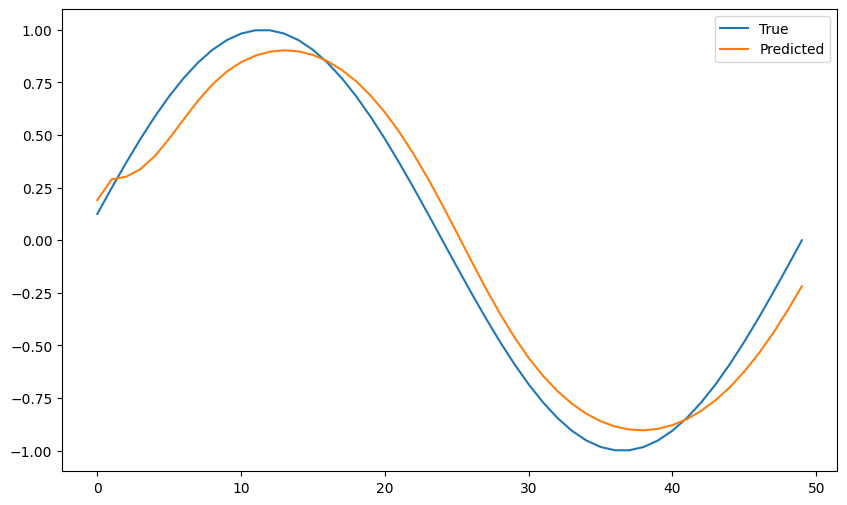

In [15]:
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)).squeeze(2).numpy()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y[0].numpy(), label='True')
plt.plot(predictions[0], label='Predicted')
plt.legend()
plt.show()